In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

all_months_data = pd.DataFrame()

files = [file for file in os.listdir("./Sales_Data")]
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)


In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.dropna(inplace = True)
all_data.reset_index(drop = True, inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Data İnfo

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


### Add Month Columns


In [5]:

all_data["Month"] = all_data["Order Date"].str[:2]


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Sorted Dataframe(Month)

In [6]:
all_data = all_data.sort_values(by="Month")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69191,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",01
70565,144300,Apple Airpods Headphones,1,150,01/11/19 14:22,"532 River St, San Francisco, CA 94016",01
70564,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",01
70563,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",01
70562,144297,Flatscreen TV,1,300,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",01


### Add Sales Column

Sales = Quantity Ordered x Price Each

In [7]:
all_data["Sales"] = 1
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"],errors = "coerce")
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"],errors = "coerce")
all_data["Month"] = pd.to_numeric(all_data["Month"],errors = "coerce")

all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
69191,142996,AAA Batteries (4-pack),1.0,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1.0,2.99
70565,144300,Apple Airpods Headphones,1.0,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1.0,150.00
70564,144299,27in 4K Gaming Monitor,1.0,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1.0,389.99
70563,144298,Lightning Charging Cable,1.0,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1.0,14.95
70562,144297,Flatscreen TV,1.0,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1.0,300.00


### Q-1 Which month had highest sales

In [8]:
all_data.reset_index(drop = True, inplace = True)


In [9]:
values_of_month = all_data.groupby("Month").sum()

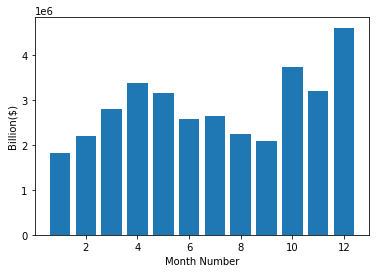

In [10]:
months_nm = range(1,13)

plt.bar(months_nm,values_of_month["Sales"])
plt.ylabel("Billion($)")
plt.xlabel("Month Number")
plt.show()


###  Q2 - Which city had highest sales

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,142996,AAA Batteries (4-pack),1.0,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1.0,2.99
1,144300,Apple Airpods Headphones,1.0,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1.0,150.00
2,144299,27in 4K Gaming Monitor,1.0,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1.0,389.99
3,144298,Lightning Charging Cable,1.0,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1.0,14.95
4,144297,Flatscreen TV,1.0,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1.0,300.00


In [12]:
all_data.dropna(inplace = True)

all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1])


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,142996,AAA Batteries (4-pack),1.0,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1.0,2.99,Boston
1,144300,Apple Airpods Headphones,1.0,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1.0,150.00,San Francisco
2,144299,27in 4K Gaming Monitor,1.0,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1.0,389.99,San Francisco
3,144298,Lightning Charging Cable,1.0,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1.0,14.95,Los Angeles
4,144297,Flatscreen TV,1.0,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1.0,300.00,Atlanta


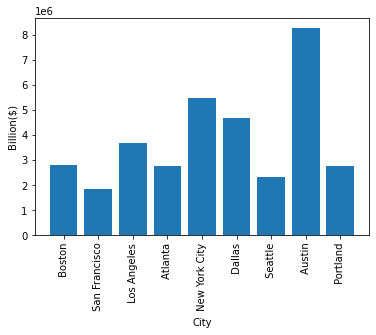

In [13]:
citys = all_data["City"].unique()
values_of_city = all_data.groupby("City").sum()

plt.bar(citys,values_of_city["Sales"])
plt.xticks(rotation="vertical")
plt.ylabel("Billion($)")
plt.xlabel("City")
plt.show()


### Q3 - What time should we display advertisements to maximize likelihood of customers buying product?

In [25]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

all_data["Time"] = all_data["Order Date"].dt.hour

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,142996,AAA Batteries (4-pack),1.0,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1.0,2.99,Boston,21
1,144300,Apple Airpods Headphones,1.0,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1.0,150.00,San Francisco,14
2,144299,27in 4K Gaming Monitor,1.0,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1.0,389.99,San Francisco,19
3,144298,Lightning Charging Cable,1.0,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",1.0,14.95,Los Angeles,12
4,144297,Flatscreen TV,1.0,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1.0,300.00,Atlanta,14


In [ ]:
hours = range(24)

values_of_time = all_data.groupby("Time").sum()

plt.bar(hours,values_of_time["Sales"])
plt.ylabel("Billion($)")
plt.xlabel("Time")
plt.show()

### Q4 - What products are most often sold together?

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  float64
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(4), object(5)
memory usage: 14.2+ MB


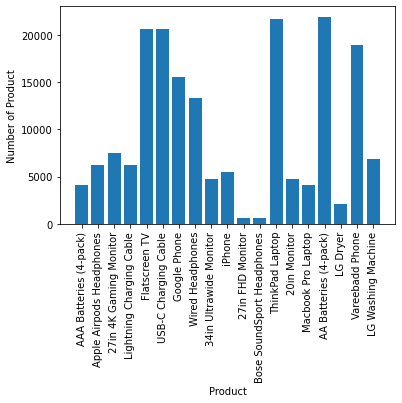

In [36]:
product_values = all_data.groupby("Product")["Product"].count()
product = all_data["Product"].unique()


plt.bar(product,product_values)
plt.ylabel("Number of Product")
plt.xticks(rotation="vertical")
plt.xlabel("Product")
plt.show()

In [35]:
#number of product
product_values

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Product, dtype: int64